# Data Cleaning of American Community Surveys

Our analysis pulls from 3 instances of the American Community Survey for Denver neighborhoods. These surveys are 5 year averages over the years 2006-2010, 2010-2014, and 2015-2019. These surveys contain a large number of features, in this notebook, we will isolate just the features that we care about. 

We are interested in understanding gentrification in Denver. We will consider only the following columns: 

**Race Information**
- PCT_HISPANIC (Percent Hispanic) 
- PCT_WHITE (Percent White) 
- PCT_BLACK (Percent Black)
- PCT_NATIVE_AM (Percent Native American)
- PCT_ASIAN (Percent Asian)
- PCT_HAWAIIAN_PI (Percent Hawaiian and Pacific Islander)
- PCT_OTHERRACE (Percent Other Race)
- PCT_TWOORMORE_RACES (Percent 2 or More Races)

**Education Information**
- TTLPOP_25PLUS_EDU (Total Population at least 25 years old used for education data)
- LESS_THAN_HS_DIPLOMA_EDU (Number of Residents with Less Than HS)
- HSGRAD_OR_EQUIV_EDU (Number of Residents with HS or HS equivelant)
- SOMECOLLEGE_OR_AA_EDU (Number of Residents with Some College or AA Degree)
- BACHELORS_OR_HIGHER_EDU (Number of Residents with a Bachelors or Higher)

**Income Information**
- PER_CAPITA_INCOME (Per Capita Income)
- AVG_HH_INCOME (Average Household Income)
- AVG_FAM_INCOME (Average Family Income)

**Poverty Information**
- PCT_IN_POVERTY (Percent in Poverty)
- PCT_FAM_POVERTY (Percent in Poverty)

**Note** Exclude AVG family income because there exists a NaN

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load Data
ACS_2006 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/american_community_survey_nbrhd_2006_2010.csv")
ACS_2010 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/american_community_survey_nbrhd_2010_2014.csv")
ACS_2015 = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/american_community_survey_nbrhd_2015_2019.csv")

In [4]:
# Columns to be used

neighborhood_col = ["NBHD_NAME"]
race_cols = ["PCT_HISPANIC", "PCT_WHITE", "PCT_BLACK", "PCT_NATIVE_AM", "PCT_ASIAN", "PCT_HAWAIIAN_PI", "PCT_OTHERRACE", "PCT_TWOORMORE_RACES"]
edu_cols = ["TTLPOP_25PLUS_EDU", "LESS_THAN_HS_DIPLOMA_EDU", "HSGRAD_OR_EQUIV_EDU", "SOMECOLLEGE_OR_AA_EDU", "BACHELORS_OR_HIGHER_EDU"]
income_cols = ["PER_CAPITA_INCOME", "AVG_HH_INCOME"]
poverty_cols = ["PCT_IN_POVERTY", "PCT_FAM_POVERTY"]

cols = neighborhood_col + race_cols + edu_cols + income_cols + poverty_cols

In [5]:
# Not all column names are consistent, fix this {'old' : 'NEW'}
ACS_2010 = ACS_2010.rename({"PCT_NATIVEAM":"PCT_NATIVE_AM", "PCT_HAWAIIANPI":"PCT_HAWAIIAN_PI", "PCT_POVERTY":"PCT_IN_POVERTY", "AVG_HH_INC":"AVG_HH_INCOME"}, axis = 1)
ACS_2015 = ACS_2015.rename({"PCT_NATIVEAM":"PCT_NATIVE_AM", "PCT_HAWAIIANPI":"PCT_HAWAIIAN_PI", "PCT_POVERTY":"PCT_IN_POVERTY"}, axis = 1)

In [6]:
# Get Neighborhood IDs and Left Join with Survey Data
neighbor_id = pd.read_csv("https://raw.githubusercontent.com/wgrewe/D2P-Optimization-Fall-2021/main/American_Community_Surveys/statistical_neighborhoods.csv")

In [7]:
# Convert education data to percentage

# Add columns for ACS 2006
ACS_2006 = ACS_2006.assign(LESS_THAN_HS_PCT=100*ACS_2006['LESS_THAN_HS_DIPLOMA_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])
ACS_2006 = ACS_2006.assign(HS_GRAD_PCT=100*ACS_2006['HSGRAD_OR_EQUIV_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])
ACS_2006 = ACS_2006.assign(SOMECOLLEGE_PCT=100*ACS_2006['SOMECOLLEGE_OR_AA_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])
ACS_2006 = ACS_2006.assign(BACHELORS_PCT=100*ACS_2006['BACHELORS_OR_HIGHER_EDU']/ACS_2006['TTLPOP_25PLUS_EDU'])

# Add columns for ACS 2010
ACS_2010 = ACS_2010.assign(LESS_THAN_HS_PCT=100*ACS_2010['LESS_THAN_HS_DIPLOMA_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])
ACS_2010 = ACS_2010.assign(HS_GRAD_PCT=100*ACS_2010['HSGRAD_OR_EQUIV_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])
ACS_2010 = ACS_2010.assign(SOMECOLLEGE_PCT=100*ACS_2010['SOMECOLLEGE_OR_AA_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])
ACS_2010 = ACS_2010.assign(BACHELORS_PCT=100*ACS_2010['BACHELORS_OR_HIGHER_EDU']/ACS_2010['TTLPOP_25PLUS_EDU'])


# Add columns for ACS 2015
ACS_2015 = ACS_2015.assign(LESS_THAN_HS_PCT=100*ACS_2015['LESS_THAN_HS_DIPLOMA_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])
ACS_2015 = ACS_2015.assign(HS_GRAD_PCT=100*ACS_2015['HSGRAD_OR_EQUIV_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])
ACS_2015 = ACS_2015.assign(SOMECOLLEGE_PCT=100*ACS_2015['SOMECOLLEGE_OR_AA_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])
ACS_2015 = ACS_2015.assign(BACHELORS_PCT=100*ACS_2015['BACHELORS_OR_HIGHER_EDU']/ACS_2015['TTLPOP_25PLUS_EDU'])


In [8]:
edu_pct_cols = ["LESS_THAN_HS_PCT", "HS_GRAD_PCT", "SOMECOLLEGE_PCT", "BACHELORS_PCT"]
clustering_cols = race_cols + edu_pct_cols + income_cols + poverty_cols

ACS_2006_clustering = ACS_2006[clustering_cols]
ACS_2010_clustering = ACS_2010[clustering_cols]
ACS_2015_clustering = ACS_2015[clustering_cols]

# Clustering Neighborhoods

In this section, we cluster neighborhoods to find different groups of neighborhoods sorted by wealth/privilege. Note: measure of gentrification isn't quite the right word to use here, gentrification is the process of making a neighborhood wealthier/whiter etc, some neighborhoods do not go through this process, for example Country Club has been rich and white for many, many years.

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
from matplotlib.pyplot import figure

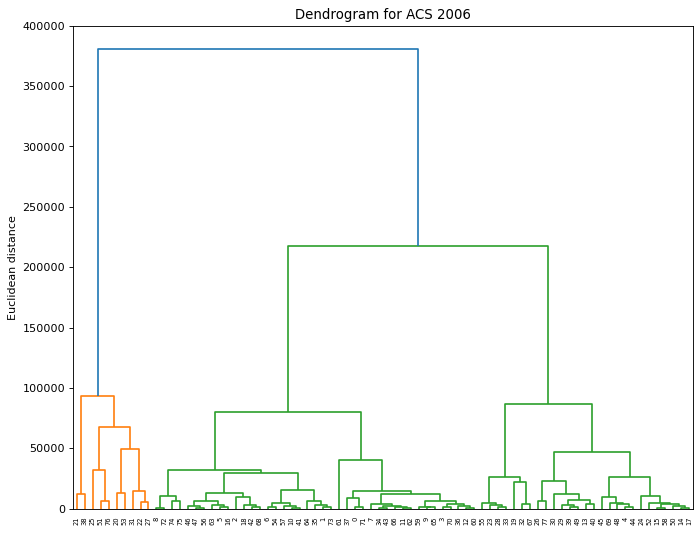

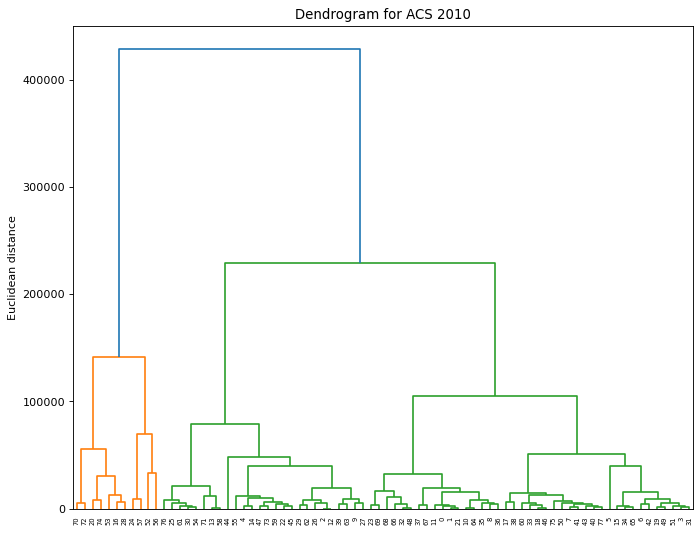

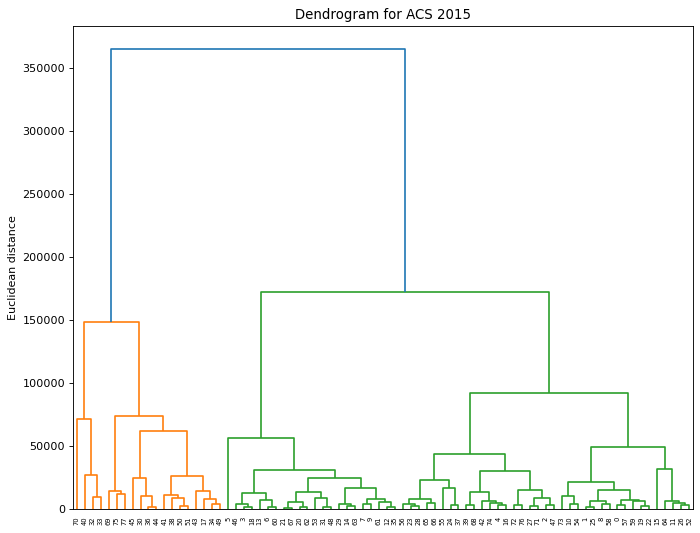

In [18]:
#Heirarchical Clustering

### Setting up how clustering will work
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

Z_06 = linkage(ACS_2006_clustering, method = 'ward')
Z_10 = linkage(ACS_2010_clustering, method = 'ward')
Z_15 = linkage(ACS_2015_clustering, method = 'ward')
 
#plotting dendrogram
figure(figsize=(10, 8), dpi=80)
dendro = dendrogram(Z_06)
plt.title('Dendrogram for ACS 2006')
plt.ylabel('Euclidean distance')
plt.savefig("2006 Dendo.png")
plt.show()

figure(figsize=(10, 8), dpi=80)
dendro = dendrogram(Z_10)
plt.title('Dendrogram for ACS 2010')
plt.ylabel('Euclidean distance')
plt.savefig("2010 Dendo.png")
plt.show()

figure(figsize=(10, 8), dpi=80)
dendro = dendrogram(Z_15)
plt.title('Dendrogram for ACS 2015')
plt.ylabel('Euclidean distance')
plt.savefig("2015 Dendo.png")
plt.show()


In [93]:
# Set number of clusters
K = 3

# KMeans with Scaling

# Create scaler: scaler
scaler_2006 = StandardScaler()
scaler_2010 = StandardScaler()
scaler_2015 = StandardScaler()

kmeans_2006 = KMeans(n_clusters=K)
kmeans_2010 = KMeans(n_clusters=K)
kmeans_2015 = KMeans(n_clusters=K)

# Create pipeline: pipeline
pipeline_2006 = make_pipeline(scaler_2006, kmeans_2006)
pipeline_2010 = make_pipeline(scaler_2010, kmeans_2010)
pipeline_2015 = make_pipeline(scaler_2015, kmeans_2015)

# Fit the pipeline to samples
pipeline_2006.fit(ACS_2006_clustering)
pipeline_2010.fit(ACS_2010_clustering)
pipeline_2015.fit(ACS_2015_clustering)

# Calculate the cluster labels: labels
labels_2006 = pipeline_2006.predict(ACS_2006_clustering)
labels_2010 = pipeline_2010.predict(ACS_2010_clustering)
labels_2015 = pipeline_2015.predict(ACS_2015_clustering)

In [96]:
labels_2006

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0], dtype=int32)

In [97]:
labels_2010

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1], dtype=int32)

In [98]:
labels_2015

array([2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)